In [1]:
import random
import numpy as np
import pandas as pd
from function.valuate import valuate_f1_score, accuracy_all, valuate_fbeta, valuate_precision_score, valuate_recall_score
from function.normalize import normalize_theta

In [2]:
def normalize_theta(theta):
    return theta / np.sum(theta)

In [3]:
def transform_x52(value):
    return -value

In [4]:

def fitness(theta):
    normalized_theta = normalize_theta(theta)
    accuracy = valuate_recall_score(normalized_theta)
    return accuracy
    

In [5]:
def generate_initial_solutions(num_solutions, num_params):
    solutions = []
    for _ in range(num_solutions):
        solution = np.random.rand(num_params)
        solutions.append(tuple(solution))
    return solutions

def crossover(parent1, parent2): # Lai giua bo va me (1 phan cua bo, 1 phan cua me)
    crossover_point = random.randint(1, len(parent1) - 1)
    child = list(parent1[:crossover_point]) + list(parent2[crossover_point:])
    return tuple(child)
def two_point_crossover(parent1, parent2):
    crossover_point1, crossover_point2 = sorted(random.sample(range(1, len(parent1)), 2))
    child = list(parent1[:crossover_point1]) + list(parent2[crossover_point1:crossover_point2]) + list(parent1[crossover_point2:])
    return tuple(child)

def mutate(child, mutation_rate):  # Ham dot bien
    mutated_child = tuple([gene * random.uniform(1 - mutation_rate, 1 + mutation_rate) for gene in child])
    return mutated_child

In [6]:
# Số lượng tham số
num_params = 16

# Số lượng giải pháp và thế hệ
num_solutions = 50
num_generations = 100

# Tạo thế hệ ban đầu
solutions = generate_initial_solutions(num_solutions, num_params)


In [7]:
for generation_id in range(num_generations):
    # print(generation_id)
    rankedsolutions = [(fitness(s), s) for s in solutions]
    rankedsolutions = sorted(rankedsolutions, key=lambda x: x[0], reverse=True)

    # print(f"=== Gen {generation_id} best solutions ===")
    # print(rankedsolutions[0][0])  # Tìm giải pháp tốt nhất

    if rankedsolutions[0][0] ==1:
        break

    bestSolutions = rankedsolutions[:10] 
    elements = np.concatenate([np.array(s[1]) for s in bestSolutions])
    newGen = []

    for _ in range(len(solutions)):
        # Crossover
        parent1, parent2 = random.choice(bestSolutions)[1], random.choice(bestSolutions)[1]
        child = two_point_crossover(parent1, parent2)

        # Mutation
        mutated_child = mutate(child, mutation_rate=0.01)

        # Chuẩn hóa tổng của mutated_child để bằng 1
        normalized_mutated_child = normalize_theta(mutated_child)

        newGen.append(normalized_mutated_child)

    solutions = newGen

In [8]:
# print(valuate(solutions[0]))

In [9]:
solutions[0]

array([0.12597842, 0.13828714, 0.03348527, 0.07492039, 0.0052838 ,
       0.01460038, 0.01884773, 0.01708731, 0.03211352, 0.10676206,
       0.10776965, 0.07008511, 0.07020338, 0.07406458, 0.06004378,
       0.05046748])

In [10]:
np.array(accuracy_all(solutions[0])).mean()

0.7411075911296467

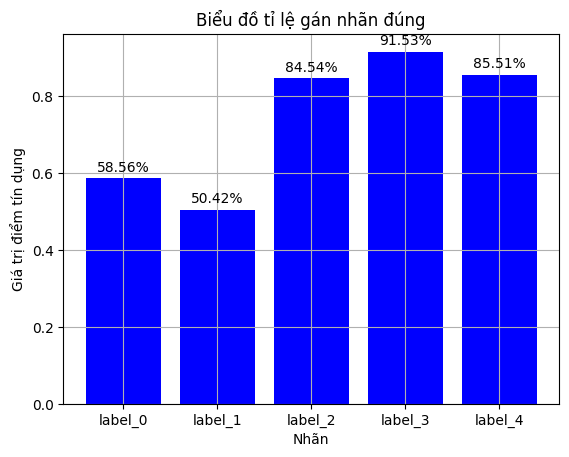

In [11]:
import matplotlib.pyplot as plt

label_name = ['label_0','label_1', 'label_2','label_3', 'label_4']
accuracy_list = accuracy_all(solutions[0])
indices = list(range(1, len(accuracy_list) + 1))

# Vẽ biểu đồ cột
plt.bar(indices, accuracy_list, color='blue')

plt.title('Biểu đồ tỉ lệ gán nhãn đúng')
plt.xlabel('Nhãn')
plt.ylabel('Giá trị điểm tín dụng')

for i, v in enumerate(accuracy_list):
    plt.text(i + 1, v + 0.01, f'\n{v*100:.2f}%', ha='center', va='bottom', color='black')

# Đặt nhãn trục x
plt.xticks(indices, label_name)
plt.grid(True)
plt.show()
